# Step 1

In [327]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [328]:

data = pd.read_csv("car-data.csv")
data = data.drop("Car_Name", axis=1)
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [329]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [330]:
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [331]:
if data.isnull().values.any():
    print("There are missing values")
else:
    print("There are no missing values")


There are no missing values


### Q1
#### a)
The numerical attributes are: Year, Selling_Price, Present_Price, Kms_Driven, Owner
The categorical attributes are: Car_Name, Fuel_Type, Seller_Type, Transmission

#### b)
There are no missing data in the dataset.

## Histograms:

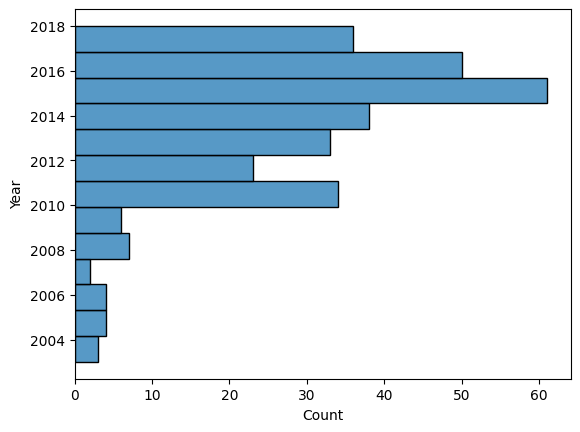

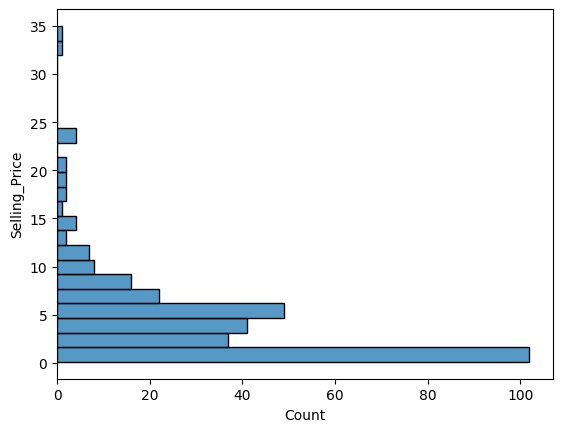

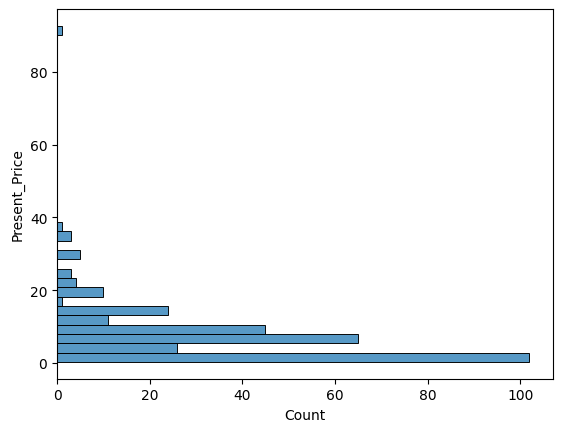

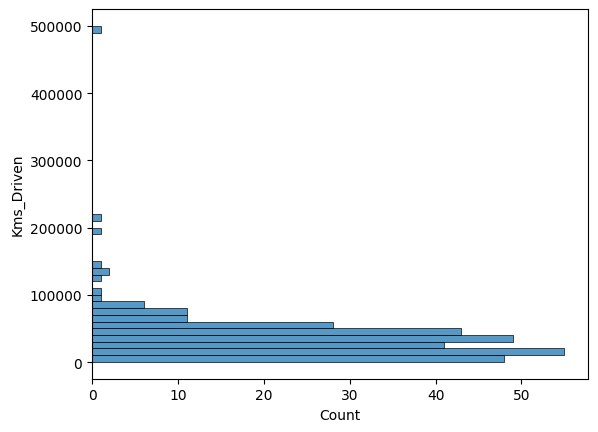

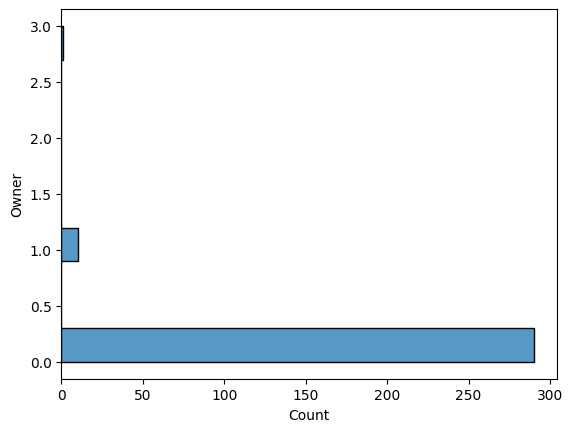

In [332]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for numerical_col in numerical_cols:
    plt.figure()
    sns.histplot(data=data, y=numerical_col)


## Stratification and Test and Train Split

In [333]:
def categorize_year(row):
    year_val = row["Year"]
    year = ""
    if 2003 <= year_val < 2006:
        year = "2003-2005"
    elif 2006 <= year_val < 2009:
        year = "2006-2008"
    elif 2009 <= year_val < 2012:
        year = "2009-2011"
    elif 2012 <= year_val < 2015:
        year = "2012-2014"
    else:
        year = "2015-2018"

    return year


data["Year_Cat"] = data.apply(categorize_year, axis=1)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(data, data["Year_Cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_train_set


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Cat
206,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0,2015-2018
140,2013,0.60,1.20,32000,Petrol,Individual,Manual,0,2012-2014
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,2009-2011
24,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0,2012-2014
49,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0,2015-2018
...,...,...,...,...,...,...,...,...,...
156,2017,0.48,0.52,15000,Petrol,Individual,Manual,0,2015-2018
278,2016,6.00,8.40,4000,Petrol,Dealer,Manual,0,2015-2018
158,2017,0.48,0.54,8600,Petrol,Individual,Manual,0,2015-2018
204,2015,2.75,4.43,28282,Petrol,Dealer,Manual,0,2015-2018


# Step 2

Correlation Matrix of Training Data

In [334]:
corr_matrix = strat_train_set.corr(method="pearson", numeric_only=True)
corr_matrix["Selling_Price"]


Year             0.190091
Selling_Price    1.000000
Present_Price    0.874357
Kms_Driven       0.036837
Owner           -0.061959
Name: Selling_Price, dtype: float64

Scatter Plots of Numerical Attributes

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Selling_Price', ylabel='Year'>,
        <Axes: xlabel='Present_Price', ylabel='Year'>,
        <Axes: xlabel='Kms_Driven', ylabel='Year'>,
        <Axes: xlabel='Owner', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Selling_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <Axes: xlabel='Owner', ylabel='Selling_Price'>],
       [<Axes: xlabel='Year', ylabel='Present_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Present_Price'>,
        <Axes: xlabel='Owner', ylabel='Present_Price'>],
       [<Axes: xlabel='Year', ylabel='Kms_Driven'>,
        <Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Presen

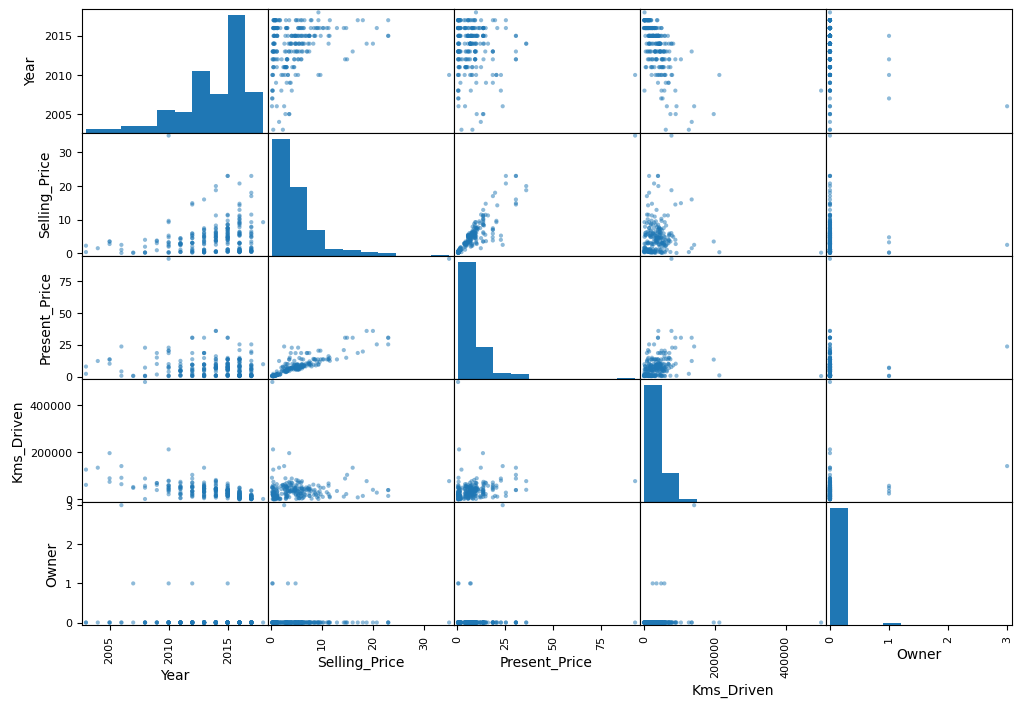

In [335]:
from pandas.plotting import scatter_matrix

scatter_matrix(strat_train_set, figsize=(12, 8))


Creating Kilometers per Year ("Kms_Per_Year") Attribute

In [336]:
strat_train_set["Kms_Per_Year"] = strat_train_set["Kms_Driven"] / \
    (strat_train_set["Year"].max()+1 - strat_train_set["Year"])
corr_matrix = strat_train_set.corr(method="pearson", numeric_only=True)
corr_matrix


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Kms_Per_Year
Year,1.000000,0.190091,-0.109867,-0.540266,-0.205827,-0.084173
Selling_Price,0.190091,1.000000,0.874357,0.036837,-0.061959,0.259670
Present_Price,-0.109867,0.874357,1.000000,0.205722,0.063400,0.268039
Kms_Driven,-0.540266,0.036837,0.205722,1.000000,0.139661,0.781894
Owner,-0.205827,-0.061959,0.063400,0.139661,1.000000,0.028090
Kms_Per_Year,-0.084173,0.259670,0.268039,0.781894,0.028090,1.000000


array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Selling_Price', ylabel='Year'>,
        <Axes: xlabel='Present_Price', ylabel='Year'>,
        <Axes: xlabel='Kms_Driven', ylabel='Year'>,
        <Axes: xlabel='Owner', ylabel='Year'>,
        <Axes: xlabel='Kms_Per_Year', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Selling_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <Axes: xlabel='Owner', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Per_Year', ylabel='Selling_Price'>],
       [<Axes: xlabel='Year', ylabel='Present_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Present_Price'>,
        <Axes: xlabel='Owner', ylabel='Present_Price'>,
        <Axes: xlabel='Kms

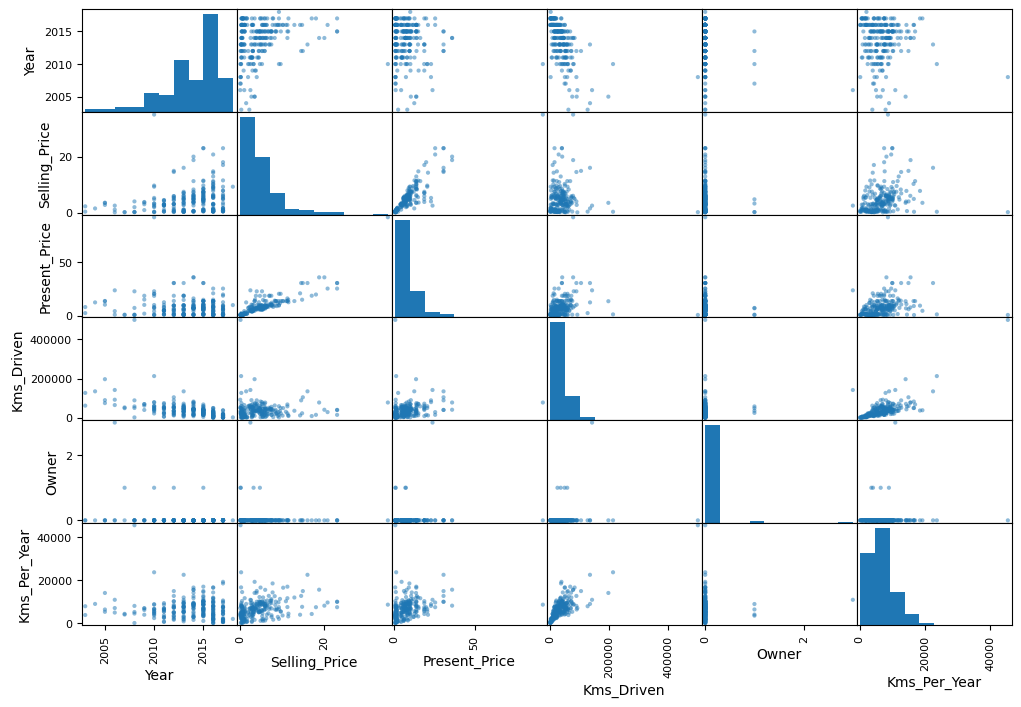

In [337]:

scatter_matrix(strat_train_set, figsize=(12, 8))


In [338]:
car_labels = strat_train_set["Selling_Price"]

car_inputs = strat_train_set.drop("Selling_Price", axis=1)

car_inputs


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Cat,Kms_Per_Year
206,2017,7.13,12479,Petrol,Dealer,Manual,0,2015-2018,6239.500000
140,2013,1.20,32000,Petrol,Individual,Manual,0,2012-2014,5333.333333
179,2010,1.05,213000,Petrol,Individual,Manual,0,2009-2011,23666.666667
24,2013,4.41,56879,Petrol,Dealer,Manual,0,2012-2014,9479.833333
49,2017,9.29,37000,Petrol,Dealer,Automatic,0,2015-2018,18500.000000
...,...,...,...,...,...,...,...,...,...
156,2017,0.52,15000,Petrol,Individual,Manual,0,2015-2018,7500.000000
278,2016,8.40,4000,Petrol,Dealer,Manual,0,2015-2018,1333.333333
158,2017,0.54,8600,Petrol,Individual,Manual,0,2015-2018,4300.000000
204,2015,4.43,28282,Petrol,Dealer,Manual,0,2015-2018,7070.500000


One-Hot Encoding Demo

In [339]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
categorical_cols = car_inputs.select_dtypes(include=object).columns.tolist()
car_inputs_cat = car_inputs[categorical_cols]
car_inputs_cat_1hot = cat_encoder.fit_transform(car_inputs_cat)
car_inputs_cat_1hot


<240x12 sparse matrix of type '<class 'numpy.float64'>'
	with 960 stored elements in Compressed Sparse Row format>

# Step 3

Defining a transformer for adding the Kms_Per_Year attribute

In [340]:
from sklearn.base import BaseEstimator, TransformerMixin


class KmsPerYearAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_kms_per_year=True):
        self.add_kms_per_year = add_kms_per_year
        self.year_index = 0
        self.kms_driven_index = 2

    def fit(self, X: np.ndarray, y=None):
        return self

    def transform(self, X: np.ndarray):
        if self.add_kms_per_year:
            kms_per_year = X[:, self.kms_driven_index] / X[:, self.year_index]
            return np.c_[X, kms_per_year]

        return X


Numerical Pipeline

In [341]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribute_adder", KmsPerYearAdder()),
    ("std_scaler", StandardScaler())
])


Column Transformer

In [342]:
from sklearn.compose import ColumnTransformer

numerical_car_cols = car_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols   = car_inputs.select_dtypes(include=object   ).columns.tolist()

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_car_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

cars_prepared = full_pipeline.fit_transform(car_inputs)

# Step 4

In [343]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, car_labels)

LinearRegression()

Root Mean Squared Error

In [344]:
from sklearn.metrics import mean_squared_error
car_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(car_labels, car_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.580422734366746

Decision Tree 

In [345]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, car_labels)

DecisionTreeRegressor()

In [346]:
car_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(car_labels, car_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Cross Validation, 10-Fold: Decision Tree

In [347]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, cars_prepared, car_labels, 
                         scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [348]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    
display_scores(tree_rmse_scores)

Scores: [3.44794987 1.35254236 0.90720496 0.69294961 1.43773984 1.47689991
 1.06002555 0.9368987  1.00903213 1.07533522]
Mean: 1.3396578136640485
Standard Deviation: 0.7415087832400876


Cross Validation, 10-Fold: Linear Regression

In [349]:
lin_scores = cross_val_score(lin_reg, cars_prepared, car_labels,
                             scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.6486431  1.66620457 1.9403383  1.88706817 2.72627307 2.08587967
 1.73762831 1.44726706 1.63627027 1.4196423 ]
Mean: 1.919521482886413
Standard Deviation: 0.43151098914610553


Cross Validation, 10-Fold: Random Forest Regression

In [350]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, cars_prepared, car_labels,
                                scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4.01035876 1.17059493 0.66310998 0.77014134 1.22126345 1.12610142
 0.60244262 0.90107377 0.7646494  0.80264496]
Mean: 1.203238061953517
Standard Deviation: 0.9576884431490988


Random Forest Regression: Whole Training Set

In [351]:
forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, car_labels)

car_predictions = forest_reg.predict(cars_prepared)

forest_mse = mean_squared_error(car_labels, car_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

0.5857729652277119

Random Forest Regression: GridSearch for best hyper parameters

In [352]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3,10,30],
        'max_features': [2,4,6,8],
    },
    {
        'bootstrap': [False],
        'n_estimators': [3,10],
        'max_features': [2,3,4]
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(cars_prepared, car_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [353]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

Important Features

In [354]:
grid_search.best_estimator_.feature_importances_

array([5.61019038e-02, 4.94374545e-01, 3.17912433e-02, 8.79263910e-05,
       2.11483811e-02, 2.99055510e-02, 1.82391152e-04, 7.77959726e-02,
       4.40324003e-02, 1.04741623e-01, 5.27795632e-02, 2.32588506e-02,
       3.17307356e-02, 1.34941083e-03, 6.65039058e-05, 1.39919410e-02,
       2.21573545e-03, 1.44453223e-02])

In [355]:
final_model = grid_search.best_estimator_
X_train = strat_train_set.drop("Selling_Price", axis=1).copy()
Y_train = strat_train_set["Selling_Price"].copy()

X_train_prepared = full_pipeline.transform(X_train)

train_predictions = final_model.predict(X_train_prepared)
train_mse = mean_squared_error(Y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_rmse


0.770015917644516

# Step 5

In [356]:
final_model = grid_search.best_estimator_

strat_test_set["Kms_Per_Year"] = strat_test_set["Kms_Driven"] / \
    (strat_test_set["Year"].max() + 1 - strat_test_set["Year"])

X_test = strat_test_set.drop("Selling_Price", axis=1).copy()


Y_test = strat_test_set["Selling_Price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.8293852481521347

Confidence Interval

In [357]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test.to_numpy()) ** 2

print(squared_errors)
stats.t.interval(confidence, len(squared_errors) - 1,
                loc = squared_errors.mean(),
                scale = stats.sem(squared_errors))

[4.44444444e-05 1.08900000e-03 1.11111111e-03 1.71610000e-02
 1.30802778e-01 9.83867778e-02 3.29476000e-01 7.20027778e-02
 1.36900000e-03 3.30027778e-02 2.26502500e+00 3.80250000e-02
 1.33712111e-01 1.69000000e-02 1.51052293e+02 1.19829511e+00
 8.77344444e-01 2.30400000e-03 5.94955111e-01 7.30080400e+00
 3.73777778e-04 5.98617778e-02 8.40277778e-01 2.01002778e-01
 1.07802778e-01 1.13067778e-02 9.71361111e-02 2.88011111e-03
 1.02346944e+00 2.87867778e-02 1.70844444e-03 8.10000000e-03
 1.60000000e-03 1.26187778e-02 1.22500000e-01 1.03361111e-02
 8.83600000e-03 6.78776178e+00 4.76694444e-02 7.93361111e-02
 2.05444444e-02 2.77377778e-01 8.41000000e-04 2.06401111e+00
 3.18027778e-02 1.09120111e-01 7.10087111e-01 1.06090000e-02
 8.10000000e-03 1.48433611e+00 1.71948444e-01 3.37579378e+00
 1.48225000e-01 7.74400000e-03 2.11661338e+01 6.00625000e-01
 6.55360000e-02 1.13777778e-02 8.21777778e-02 4.01111111e-03
 1.77802778e-01]


(-1.635979548262723, 8.329280320576018)

Coefficient of Determination (R^2)

In [358]:
from sklearn.metrics import r2_score
r2_score(Y_test, final_predictions)

0.8988732980147371

In [359]:
from joblib import dump

dump(final_model, 'car_model.joblib')

['car_model.joblib']